# Exercise on low momentum electrons


## Low momentum electron collection

In this exercise, we will explore the low momentum electron collection stored in NANO AOD.
This collection is called "LowPtElectron," and it is a separate collection from the standard "Electron" collection.
The purpose of the "LowPtElectron" is to provide analyses with access to lower momentum electrons.

The "Electron" collection has the requirement $p_{T} > 5$, but the "LowPtElectron" collection has the requirement $p_{T} > 1$.

### Documentation

The paper describing the implementation of the low momentum electron collection is here:

https://doi.org/10.1051/epjconf/202024501025​

To view the LowPtElectron variable names and descriptions, go to the NANO AOD documentation page:

https://cms-nanoaod-integration.web.cern.ch/autoDoc/

Then, click on the NANO AOD version that corresponds to the dataset you are using.
For example, for 2023 data and MC, select NanoAODv12.
The page for 2023 data is [here](https://cms-nanoaod-integration.web.cern.ch/autoDoc/NanoAODv12/2023Prompt/doc_EGamma0_Run2023C-PromptNanoAODv12_v2-v2.html) and 2023 MC is [here](https://cms-nanoaod-integration.web.cern.ch/autoDoc/NanoAODv12/2022/2023/doc_DYJetsToLL_M-50_TuneCP5_13p6TeV-madgraphMLM-pythia8_Run3Summer22NanoAODv12-130X_mcRun3_2022_realistic_v5-v2.html).



In [40]:
import uproot
from glob import glob

# Important:
# To load datasets, set the "base_directory" path based on the computing cluster (SWAN or Purdue).

# SWAN
base_directory = "/eos/user/c/cmsdas/2024/short-ex-egm/datasets/"

# Purdue
#base_directory = "/work/projects/hats2024/egamma/datasets/"

# DY
dyfiles = sorted(
    glob(
        f"{base_directory}DYto2L-2Jets_MLL-50_TuneCP5_13p6TeV-amcatnloFXFX-pythia8/*.root"
    )
)

# Data (EGamma trigger)
datafiles = sorted(glob(f"{base_directory}EGamma1_Run2023C/*.root"))

# Print number of files for each dataset
print("Number of DY files: {0}".format(len(dyfiles)))
print("Number of Data (EGamma trigger) files: {0}".format(len(datafiles)))

file = uproot.open(dyfiles[0])
print("Example file info:")
dict(file)

Number of DY files: 4
Number of Data (EGamma trigger) files: 4
Example file info:


{'tag;1': <TObjString 'untagged' at 0x7f33b83c2580>,
 'Events;1': <TTree 'Events' (1782 branches) at 0x7f33b839cf10>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (6 branches) at 0x7f33b839c2e0>,
 'Runs;1': <TTree 'Runs' (10 branches) at 0x7f3491e31910>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f33b839cfd0>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f3491e31340>}

In [2]:
from coffea.nanoevents import NanoEventsFactory

dyevents = NanoEventsFactory.from_root(dyfiles[0]).events()
dataevents = NanoEventsFactory.from_root(datafiles[0]).events()

In [3]:
# Electron collection: slimmedElectrons after basic selection (pt > 5)
print(dyevents.Electron)
# LowPtElectron collection: slimmedLowPtElectrons after basic selection (pt > 1. && electronID('ID') > -0.25)
print(dyevents.LowPtElectron)

[[], [Electron], [], [], [], [], ... [], [], [Electron, Electron], [], [], []]
[[{convVeto: True, convWP: 0, lostHits: 0, ... genPartFlav: 0, genPartIdx: -1}]]


In [4]:
# Electron collection variables:
dyevents.Electron.fields

['seediEtaOriX',
 'convVeto',
 'cutBased',
 'cutBased_HEEP',
 'isPFcand',
 'jetNDauCharged',
 'lostHits',
 'mvaIso_WP80',
 'mvaIso_WP90',
 'mvaNoIso_WP80',
 'mvaNoIso_WP90',
 'seedGain',
 'tightCharge',
 'jetIdx',
 'photonIdx',
 'svIdx',
 'fsrPhotonIdx',
 'charge',
 'pdgId',
 'seediPhiOriY',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaHZZIso',
 'mvaIso',
 'mvaNoIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'scEtOverPt',
 'sieie',
 'sip3d',
 'mvaTTH',
 'genPartFlav',
 'genPartIdx',
 'genPartIdxG',
 'jetIdxG',
 'photonIdxG']

In [5]:
# LowPtElectron collection variables:
dyevents.LowPtElectron.fields

['convVeto',
 'convWP',
 'lostHits',
 'electronIdx',
 'photonIdx',
 'charge',
 'pdgId',
 'ID',
 'convVtxRadius',
 'deltaEtaSC',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'phi',
 'pt',
 'ptbiased',
 'r9',
 'scEtOverPt',
 'sieie',
 'unbiased',
 'genPartFlav',
 'genPartIdx']

In [6]:
# Electron ID (cut based):
dyevents.Electron.cutBased.__doc__

'cut-based ID RunIII Winter22 (0:fail, 1:veto, 2:loose, 3:medium, 4:tight)'

In [7]:
# LowPtElectron ID (BDT raw score):
dyevents.LowPtElectron.ID.__doc__

'ID, BDT (raw) score'

In [8]:
# import awkward and numpy
import awkward as ak
import numpy as np

# import and set up plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

mplhep.style.use(mplhep.style.CMS)

In [9]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [10]:
# Using numpy.linspace(start, stop, num) for bin edges:
# - For the [min, max] range you want to use, set start = min and stop = max.
# - Set num to the number of bin edges = (number of bins + 1).
# - Think of this as a list of bin edges.

# Example for the range [0, 10] with 10 bins (11 bin edges), bin width = 1.0
# start = 0, stop = 10, num = 11
bin_edges = np.linspace(0, 10, 11)
n_bin_edges = len(bin_edges)
n_bins = n_bin_edges - 1

print(f"bin_edges: {bin_edges}")
print(f"n_bin_edges: {n_bin_edges}")
print(f"n_bins: {n_bins}")

bin_edges: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
n_bin_edges: 11
n_bins: 10


(array([    0.,     0.,     0.,     0.,     0., 34074., 24554., 19037.,
        15490., 13321., 11998., 11170., 10120.,  9765.,  9413.,  9270.,
         8980.,  8993.,  9219.,  9115.,  9229.,  9324.,  9612.,  9553.,
         9730.,  9804.,  9879., 10051., 10288., 10366., 10467., 10860.,
        10899., 10898., 10972., 11143., 11422., 11459., 11661., 11712.,
        12001., 11871., 11903., 11573., 10915., 10224.,  8993.,  8112.,
         6805.,  5974.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

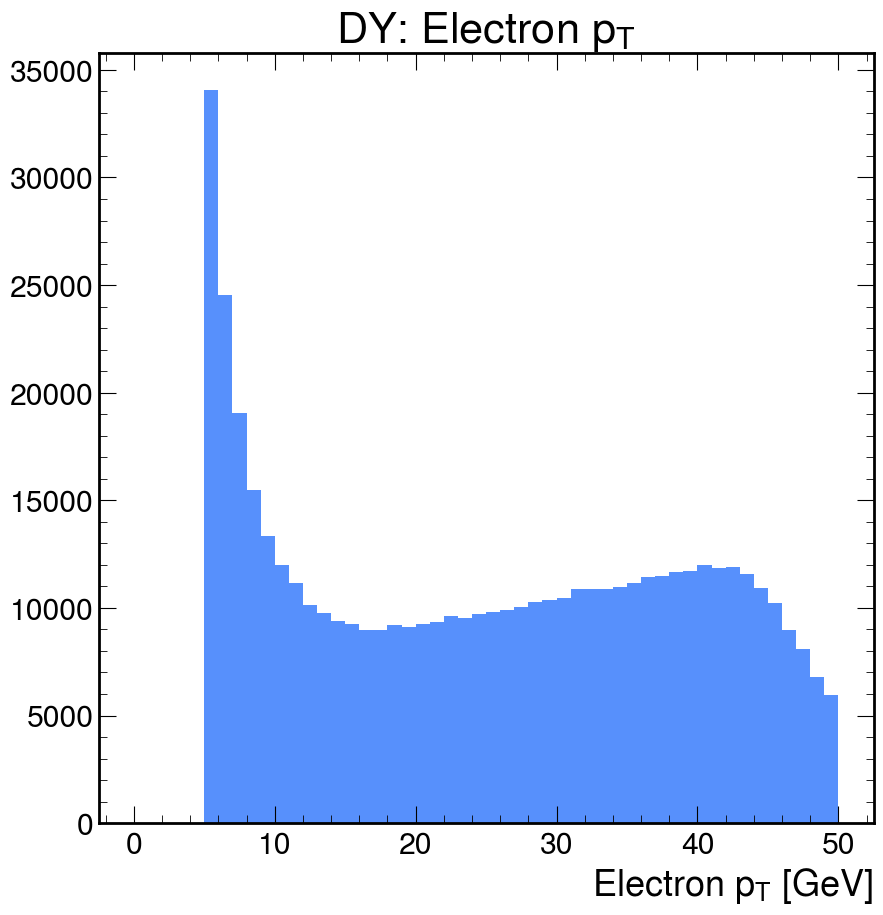

In [11]:
# Electron pT
fig, ax = plt.subplots()
ax.set_title(r"DY: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.hist(ak.flatten(dyevents.Electron.pt), bins=np.linspace(0, 50, 51))

(array([     0.,  54387., 105873.,  52187.,  28170.,  17593.,  13100.,
         10855.,   9341.,   8772.,   8301.,   8128.,   7882.,   8015.,
          8098.,   8279.,   8435.,   8815.,   9422.,   9815.,  10089.,
         10070.,  10213.,   9737.,   9772.,  10024.,  10133.,  10665.,
         10699.,  10989.,  11475.,  11777.,  12257.,  12308.,  12561.,
         12506.,  12532.,  12410.,  12104.,  11935.,  11303.,  10883.,
         10035.,   8746.,   7527.,   6382.,   5656.,   4820.,   4088.,
          3614.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

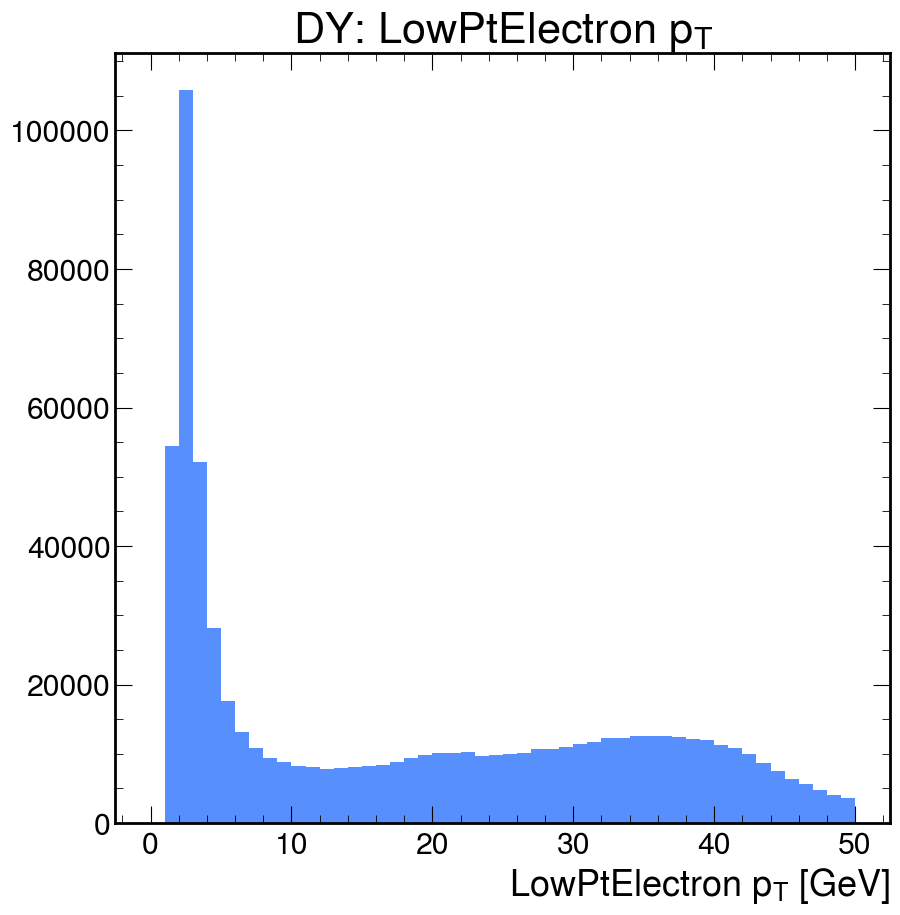

In [12]:
# LowPtElectron pT
fig, ax = plt.subplots()
ax.set_title(r"DY: LowPtElectron $p_{T}$")
ax.set_xlabel(r"LowPtElectron $p_{T}$ [GeV]")
ax.hist(ak.flatten(dyevents.LowPtElectron.pt), bins=np.linspace(0, 50, 51))

(array([18840., 18168., 17191., 16390., 15888., 14745., 13927., 13662.,
        12696., 12126., 11870., 11037., 10754., 10356.,  9990.,  9319.,
         9015.,  8792.,  8449.,  8155.,  7956.,  7816.,  7700.,  7433.,
         7312.,  7119.,  7111.,  6944.,  6959.,  6750.,  6627.,  6641.,
         6608.,  6580.,  6525.,  6290.,  6314.,  6405.,  6498.,  6449.,
         6554.,  6482.,  6708.,  6817.,  6725.,  6765.,  6976.,  7025.,
         7159.,  7279.,  7352.,  7494.,  7696.,  7628.,  7602.,  7684.,
         7860.,  7783.,  7914.,  7982.,  8063.,  7868.,  7852.,  7825.,
         7539.,  7532.,  7344.,  7189.,  6755.,  6605.,  6266.,  5940.,
         5566.,  5220.,  4918.,  4542.,  4024.,  3573.,  3271.,  2884.,
         2496.,  2310.,  1940.,  1629.,  1427.,  1170.,   962.,   767.,
          647.,   544.,   428.,   302.,   248.,   193.,   129.,   113.,
           85.,    66.,    42.,    24.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2, 

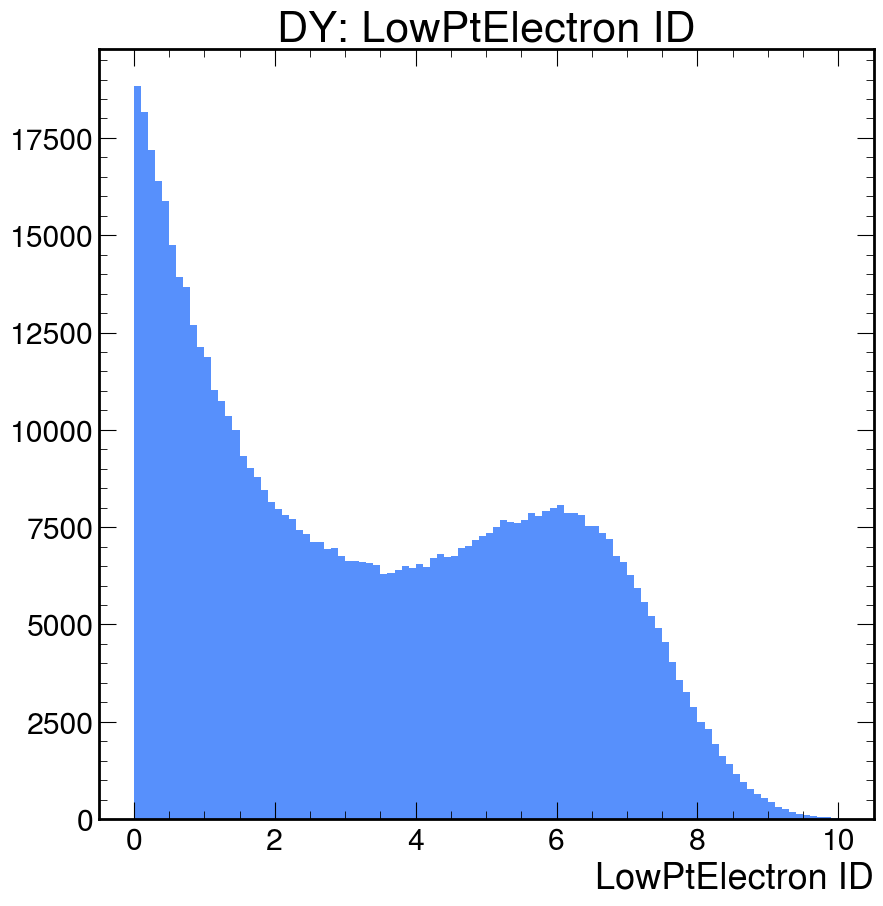

In [13]:
# LowPtElectron ID
fig, ax = plt.subplots()
ax.set_title(r"DY: LowPtElectron ID")
ax.set_xlabel(r"LowPtElectron ID")
ax.hist(ak.flatten(dyevents.LowPtElectron.ID), bins=np.linspace(0, 10, 101))

**Plot the same distribution (LowPtElectron ID) for data!**

Hint: Use `dataevents` instead of `dyevents` and change the title.

In [14]:
# LowPtElectron ID
# TODO: Put your code here...

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [13., 20., 16., ...,  0.,  0.,  0.],
        [26., 11., 17., ...,  0.,  0.,  0.],
        [18., 18., 15., ...,  0.,  0.,  0.]]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
        11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
        13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
        15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
        17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
        19.8, 20. ]),
 array([ 0. ,  0.1,  0.2,  

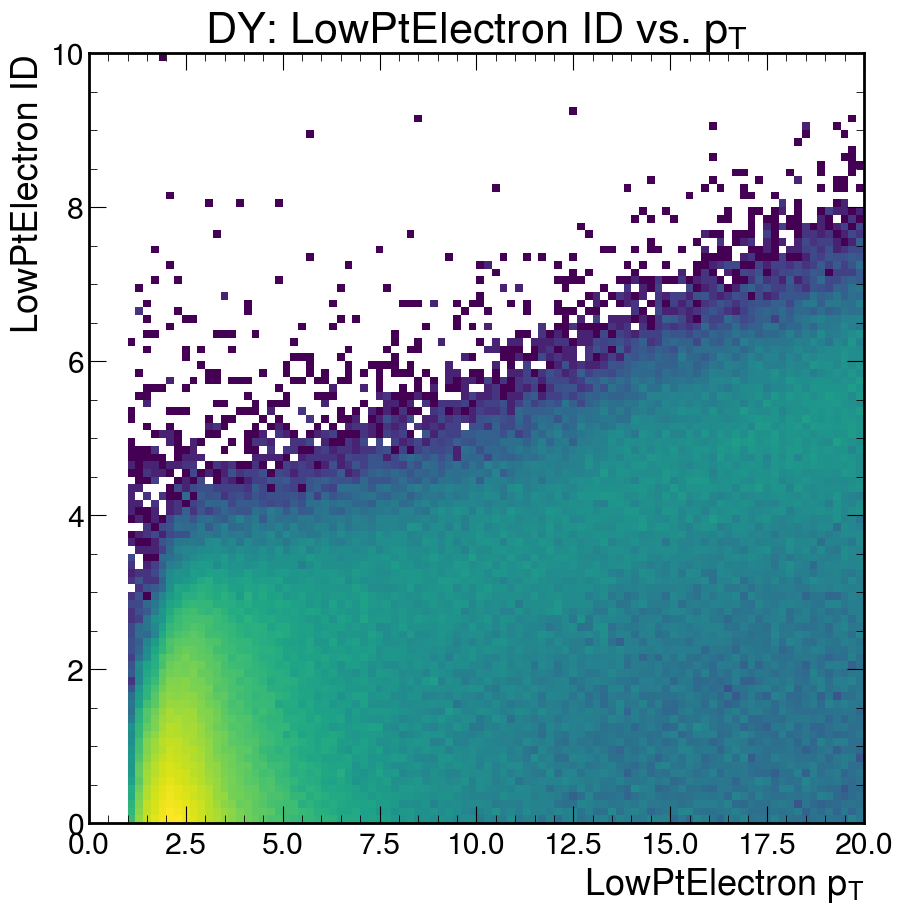

In [15]:
# LowPtElectron ID vs. pT
fig, ax = plt.subplots()
ax.set_title(r"DY: LowPtElectron ID vs. $p_{T}$")
ax.set_xlabel(r"LowPtElectron $p_{T}$")
ax.set_ylabel(r"LowPtElectron ID")
log_norm = mcolors.LogNorm()
ax.hist2d(
    ak.flatten(dyevents.LowPtElectron.pt),
    ak.flatten(dyevents.LowPtElectron.ID),
    bins=[np.linspace(0, 20, 101), np.linspace(0, 10, 101)],
    norm=log_norm,
)

**Plot the same distribution (LowPtElectron ID vs. pT) for data!**

Hint: Use `dataevents` instead of `dyevents` and change the title.

In [16]:
# LowPtElectron ID vs. pT
# TODO: Put your code here...

## Comparing the Z boson and the J/psi meson

<img src="Pics/dielectron_mass_with_arrows.png" alt="dielectron mass with arrows" width="800" height="400">

The Z boson can decay directly to an electron-positron pair, and the J/psi meson (composed of a charm quark and a charm antiquark) can decay to an electron-positron pair through a photon mediator. However, the Z boson (mass of 91.2 GeV) is much more massive than the J/psi meson (mass of 3.1 GeV). This means that in the rest frame of the decaying particle (center-of-momentum frame), electrons decaying from a Z boson will have a much larger momentum (approx. 45.6 GeV) compared to electrons decaying from a J/psi meson (approx. 1.6 GeV).

In the rest frame of the CMS detector, the electron decay will not necessarily be fully transverse, so only a fraction of the momentum will be in the transverse direction. In addition, the Z boson or J/psi meson likely have some momentum (some amount of boost) that also contributes to the momenta of electrons.


[[], [0.958], [], [], [], [], [1.03], ... [], [], [], [0.944, 0.959], [], [], []]
[True, False, True, True, True, True, True, ... True, True, False, True, True, True]
[<event 1:16000:42013385>, <event 1:16000:42013375>, ... <event 1:194745:511400366>]


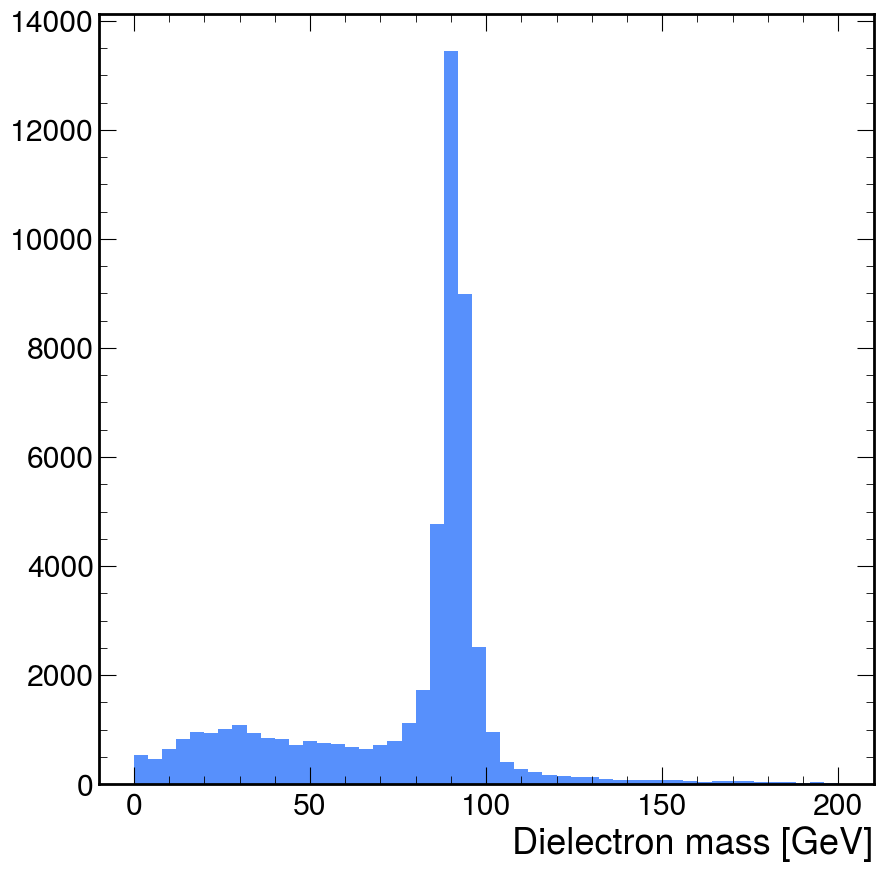

In [17]:
# electrons: dielectron mass

fig, ax = plt.subplots()
ax.set_xlabel(r"Dielectron mass [GeV]")
event_cut = ak.all(dyevents.Electron.r9 > 0.96, axis=1)
print(dyevents.Electron.r9)
print(event_cut)
print(dyevents[event_cut])
# ee = ak.combinations(dyevents.Electron, 2, fields = ["e0", "e1"])
ee = ak.combinations(dyevents[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(0, 200, 51));

[[5.17, 1.35], [5.56], [], [0.0842], ... [2.62], [], [-0.197, 1.46, 0.474], []]
[True, True, True, False, True, True, ... True, False, True, True, False, True]
[<event 367661:66:42391243>, ... <event 367758:763:1672688339>]


/depot/cms/kernels/python3/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


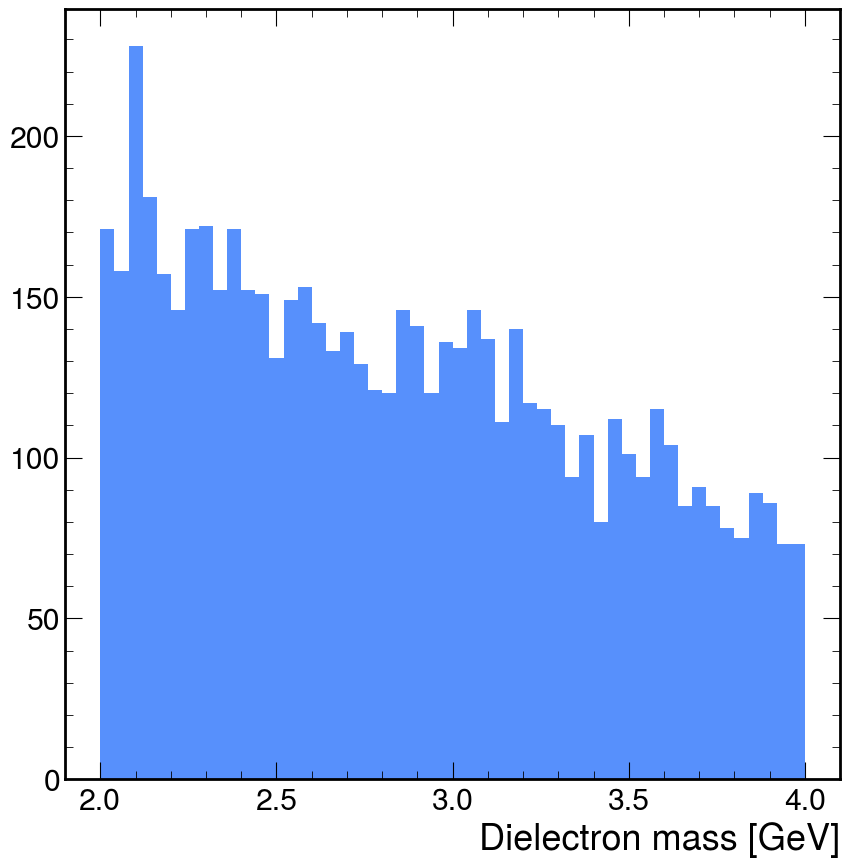

In [18]:
# low pt electrons: dielectron mass

fig, ax = plt.subplots()
ax.set_xlabel(r"Dielectron mass [GeV]")
event_cut = ak.all(dataevents.LowPtElectron.ID > 1.0, axis=1)
print(dataevents.LowPtElectron.ID)
print(event_cut)
print(dataevents[event_cut])

ee = ak.combinations(dataevents[event_cut].Electron, 2, fields=["e0", "e1"])
mass = (ee.e0 + ee.e1).mass
ax.hist(ak.flatten(mass), bins=np.linspace(2, 4, 51));

Why don't we see the J/psi mass resonance in this plot?

Hint: Think about the dataset we are using and the requirements that events must pass to be included.

## Electron tag and probe using J/psi meson decays

| ![Z to EE](Pics/ZToEE.png) | ![J/psi to EE](Pics/JPsiToEE.png) |
|----------------------------|-----------------------------------|

<img src="Pics/CMS_JPsi.png" alt="CMS J/psi" width="800" height="400">

In [19]:
# import tools
#%matplotlib ipympl
from Tools.cailb_sim import *

In [20]:
# Define parameters

# Z mass peak
target_mean = 91
target_std = 2.5
xlim = [60, 120]
ylim = [0, 6000]
bin_width = 0.5

# J/psi mass peak
# TODO: Put your code here...

# Generate electron pairs
pT1, pT2, eta1, eta2, phi1, phi2 = generate_electron_pairs_with_mass(
    50000, mean=target_mean, std=target_std
)

In [21]:
# Reconstruction
alpha_Calib = 1.1  # Guess for detector calibration
laser_scenario = 1  # Guess for detector scenario
recopT1, recopT2, recoeta1, recoeta2, recophi1, recophi2 = reco_electron_pairs(
    pT1,
    pT2,
    eta1,
    eta2,
    phi1,
    phi2,
    calib=alpha_Calib,
    laser_corrections_scenario=laser_scenario,
)

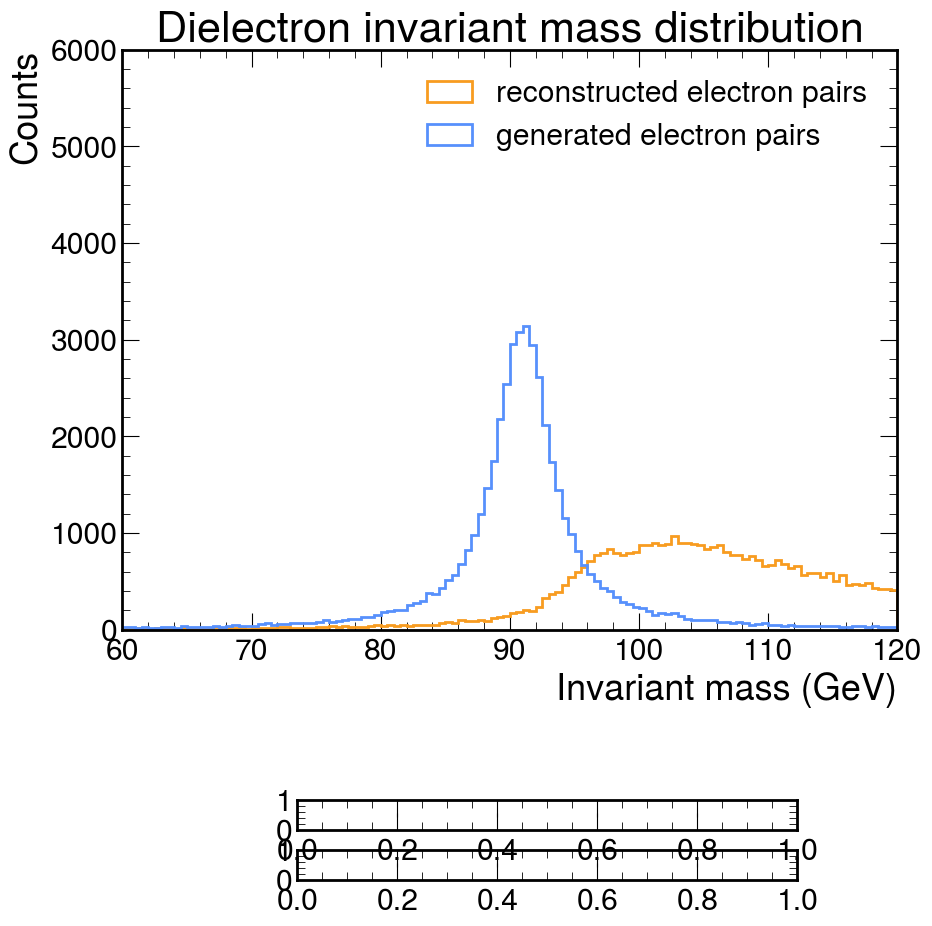

In [22]:
# Calculate dielectron invariant mass
# %matplotlib ipympl

# Mass of generated electrons
gen_m_ee = calculate_invariant_mass(pT1, pT2, eta1, eta2, phi1, phi2)

# Mass of reconstructed electrons
reco_m_ee = calculate_invariant_mass(
    recopT1, recopT2, recoeta1, recoeta2, recophi1, recophi2
)

# Plot dielectron invariant mass
make_mass_plot(
    gen_m_ee,
    reco_m_ee,
    alpha_Calib,
    laser_scenario,
    pT1,
    pT2,
    eta1,
    eta2,
    phi1,
    phi2,
    xlim,
    ylim,
    bin_width,
)

**Plot the same distribution (dielectron invariant mass) for a J/psi resonance!**

Hint: Update target_mean, target_std, and the histogram parameters.